# Audio Analysen

In diesem Notebook wird versucht herauszufinden ob die Erkenntnisse aus dem Stand der Praxis stimmen. Dies bedeutet, es soll gezeigt werden, welche Arten Noise am wenigsten oder am meisten Aufschluss geben über Stimmen, welche im Hintergrund zu hören sind.  

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display
from scipy.io import wavfile
from scipy.io.wavfile import write

Als erstes wird das Testaudio welches den Secret Text mit dem White Noise enthält eingelesen. 

In [2]:
AudioName = "../Audio/Testaudios/T_WHITE-15.wav" # Audio File mit Talk Noise
AudioName2 = "../Audio/Testaudios/T_TALK-15.wav" # Audio File mit White Noise
AudioName3 = "../Audio/Testaudios/T_SINUS-35_200Hz.wav" # Audio File mit White Noise
AudioName4 = "../Audio/Testaudios/T_PINK.wav" # Audio File mit White Noise

y, sr = librosa.load(AudioName, 44_100)
y2 , sr = librosa.load(AudioName2, 44_100)
y3 , sr = librosa.load(AudioName3, 44_100)
y4 , sr = librosa.load(AudioName4, 44_100)

/tmp/ipykernel_34815/2585025942.py:6: FutureWarning: Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y, sr = librosa.load(AudioName, 44_100)
/tmp/ipykernel_34815/2585025942.py:7: FutureWarning: Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y2 , sr = librosa.load(AudioName2, 44_100)
/tmp/ipykernel_34815/2585025942.py:8: FutureWarning: Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y3 , sr = librosa.load(AudioName3, 44_100)
/tmp/ipykernel_34815/2585025942.py:9: FutureWarning: Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y4 , sr = librosa.load(AudioName4, 44_100)


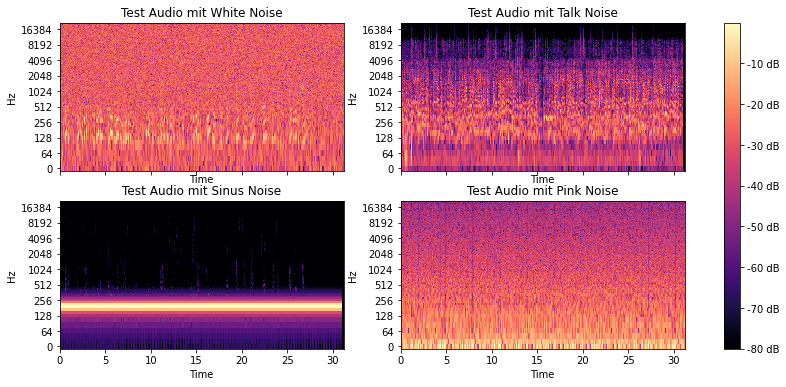

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(14, 6))


# plot 1 mit 
hop_length = 1024
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)),ref=np.max)
img = librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length, x_axis='time', ax=ax[0,0])
ax[0,0].set(title='Test Audio mit White Noise')

# plot 2 nach dem Filtern
D = librosa.amplitude_to_db(np.abs(librosa.stft(y2, hop_length=hop_length)),ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length, x_axis='time', ax=ax[0,1])
ax[0,1].set(title='Test Audio mit Talk Noise')


# plot 3 nach dem Filtern
D = librosa.amplitude_to_db(np.abs(librosa.stft(y3, hop_length=hop_length)),ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length, x_axis='time', ax=ax[1,0])
ax[1,0].set(title='Test Audio mit Sinus Noise')

# plot 4 nach dem Filtern
D = librosa.amplitude_to_db(np.abs(librosa.stft(y4, hop_length=hop_length)),ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length, x_axis='time', ax=ax[1,1])
ax[1,1].set(title='Test Audio mit Pink Noise')

fig.colorbar(img, ax=ax, format="%+2.f dB")


Man kann sehen, dass White Noise definitiv am meisten Störungen im Spektogramm besitzt. Das Audio File Mit Talk Noise besitzt auch noch ziemlich viel Störgeräusche, aber insgesammt ein bisschen weniger als bei White Noise.